In [194]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

1) Localisation : Extraire Pays,Ville et Region

In [195]:
#feature location  a revoir quadn on passe a la page suivante (66-> 67)
location = []
for i in range (5,10):
    r = requests.get(
        'https://www.ooyyo.com/france/used-cars-for-sale/c=CDA31D7114D3854F111BFB6FAA6{}1453/'.format(i))
    soup = bs(r.content, 'lxml')
    
    for j in range(0,15):
        data_loc = soup.find_all("div", {"class": "mob-location"})
        str = data_loc[j].text
        str = str.replace('\n', "")
        location.append(str)


len(location)

75

In [196]:
#get district
Region=[]
Pays=[]
Ville=[]
for loc in range(len(location)):
    strregion = location[loc].partition(',')[2].rpartition(',')[0]
    strpays = location[loc].partition(',')[2].rpartition(',')[2]
    strville = location[loc].partition(',')[0]
    Ville.append(strville)
    Region.append(strregion)
    Pays.append(strpays)



2. Other Features Fuel, Make, Model,Trim, Yeah,Km, Price (target variable)


In [197]:
Fuel = []
for i in range(1, 10):
    r = requests.get(
        'https://www.ooyyo.com/france/used-cars-for-sale/c=CDA31D7114D3854F111BFB6FAA6{}1453/'.format(i))
    soup = bs(r.content, 'lxml')

    for j in range(0, 15):
        description = soup.find_all("div", {"class": "description"})
        str = data_loc[j].text
        # str = str.replace('\n', "")
        # location.append(str)
        fuel=soup.find_all()
        # print(str)
        
    for fuel in description:
        temp = fuel.find_next("span").find_next("span").text.partition(',')[0]
        Fuel.append(temp)


In [198]:
Make=[]
temph2=[]
for i in range(1, 10):
    r = requests.get(
        'https://www.ooyyo.com/france/used-cars-for-sale/c=CDA31D7114D3854F111BFB6FAA6{}1453/'.format(i))
    soup = bs(r.content, 'lxml')

    for j in range(0, 15):
        find_beta = soup.find_all("div", {"class": "beta"})
  
    for data in find_beta:
        temp = data.find('h2')
        # print(temp.text)
        temph2.append(temp)

for text in temph2:
        temp = text.find_next("span").find_next('span')
        Make.append(temp.text)




In [199]:
Model = []
temph2 = []
for i in range(1, 10):
    r = requests.get(
        'https://www.ooyyo.com/france/used-cars-for-sale/c=CDA31D7114D3854F111BFB6FAA6{}1453/'.format(i))
    soup = bs(r.content, 'lxml')
    for j in range(0, 15):
        find_beta = soup.find_all("div", {"class": "beta"})

    for data in find_beta:
        temp = data.find('h2')
        # print(temp.text)
        temph2.append(temp)

for text in temph2:
    temp = text.find_next("span").find_next("span").find_next("span")
    Model.append(temp.text)



In [200]:

# trim = []
# i=1
# temph2 = []
# for i in range(1, 10):
#     r = requests.get(
#         'https://www.ooyyo.com/france/used-cars-for-sale/c=CDA31D7114D3854F111BFB6FAA6{}1453/'.format(i))
#     soup = bs(r.content, 'lxml')
#     for j in range(0, 15):
#         find_beta = soup.find_all("div", {"class": "beta"})

#     for data in find_beta:
#         temp = data.find('h2')
#         temph2.append(temp)

# for block in temph2:
#     str=block.text
#     str=str.replace("\n",'_')
#     str=str.split("_")[4]
#     trim.append(str)


In [201]:
Year = []
temph2 = []
for i in range(1, 10):
    r = requests.get(
        'https://www.ooyyo.com/france/used-cars-for-sale/c=CDA31D7114D3854F111BFB6FAA6{}1453/'.format(i))
    soup = bs(r.content, 'lxml')
    #Yearr = soup.select("h2 + span")
    for j in range(0,15):
        find_beta = soup.find_all("div", {"class": "beta"})

    for data in find_beta:
        temp = data.find('h2')
            # print(temp.text)
        temph2.append(temp)
for text in temph2:
        temp = text.find_next("span")
        Year.append(temp.text)


In [202]:
Km = []
temph2 = []
for i in range(1, 10):
    r = requests.get(
        'https://www.ooyyo.com/france/used-cars-for-sale/c=CDA31D7114D3854F111BFB6FAA6{}1453/'.format(i))
    soup = bs(r.content, 'lxml')

    for i in range(0, 15):
        find_beta = soup.find_all("div", {"class": "mileage"})

    for data in find_beta:
        temp= data.find('strong').text
        temp= temp.replace("\n","")
        temp = temp.replace(",", ".")
        temp = temp.replace("km", "")
        temp = temp.replace(" ", "")

        Km.append(float(temp))

Km= np.asarray(Km)



In [203]:
# if sur le nombre
Price = []
for i in range(1, 10):
    r = requests.get(
        'https://www.ooyyo.com/france/used-cars-for-sale/c=CDA31D7114D3854F111BFB6FAA6{}1453/'.format(i))
    soup = bs(r.content, 'lxml')
    find_tag = soup.find_all("a", {"class": "car-card-1"})
    for data in find_tag:
        temp = data.attrs["data-price"]
        Price.append(temp)


In [204]:
assert len(Make) == len(Model) == len(Km)== len(Price)== len(Year) == len(Fuel)

3) Handle categorical features and maybe map some Km or price 


In [218]:
d = {'Make':Make,'Model':Model,'Km':Km,'Year':Year,'Fuel':Fuel,'Price':Price}


In [206]:
df = pd.DataFrame(data=d)
df.head()

,Make,Model,Km,Trim,Year,Fuel,Price
0,Volvo,Xc40,58.686,2.0 D3 AWD,2019,Diesel,36990
1,Škoda,Kodiaq,68.342,1.5 2.0 dsg scr tdi,2020,Diesel,29990
2,Opel,Crossland X,34.575,1.2,2019,Petrol,15990
3,Opel,Crossland X,28.646,1.2,2019,Petrol,14990
4,Audi,A5,69.497,2.0,2016,Diesel,24900


c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency Distribution Plot of Prices in euros')

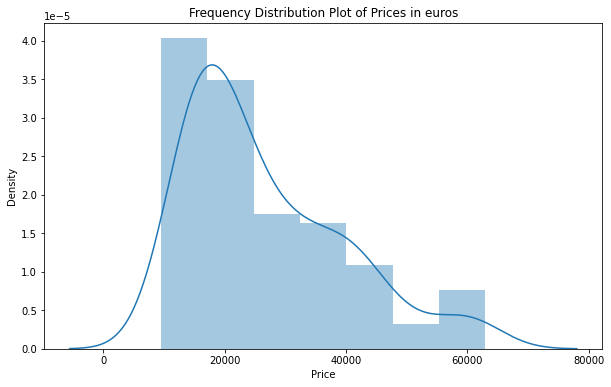

In [207]:
x=df.Price
plt.figure(figsize=(10, 6))
sns.distplot(x).set_title('Frequency Distribution Plot of Prices in euros')


In [222]:
df['Price'] = df['Price'].astype(float, errors='raise')
df['Year'] = df['Year'].astype(float, errors='raise')


In [209]:
df.dtypes

Make      object
Model     object
Km       float64
Trim      object
Year     float64
Fuel      object
Price    float64
dtype: object

In [210]:
df.Km = df.Km*1000


Text(0.5, 1.0, 'Km vs Price')

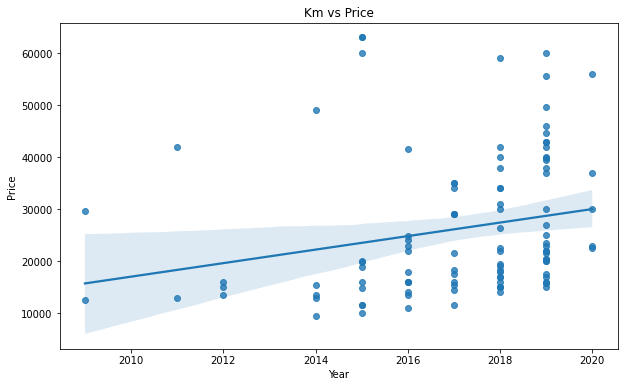

In [213]:
df = df[df.Year < 2021]
plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='Price', data=df).set_title('Km vs Price')


In [217]:
df.Model.nunique()
df.Make.nunique()

19